# OLS Bias Estimation for AR(1)


Name: Timothy Petliar
ID=N12592901

This is my work for the 4th homework. The goal of this assignment is demonstrate that the ordinary least square estimate of the for an AR(1) is downward biased on average. Unfortunetly this program suffers from an error I have been unable to find.



In [2]:
import numpy as np
N=np.arange(50, 550, 50)
alpha = np.arange(0.6, 1.0,0.1)
beta=np.full(4, 1.0)
s=np.full(4,1.0)
from numba import jit

In this section I store the sample sizes and parameters as numpy array. Working with arrays should allow me to compute the the results for all the parameters at the same time.

In [3]:
@jit
def ar1_ols_data(n, alpha, beta, s):
    y=beta/(1-alpha)
    sm_x=0.0
    sm_y=0.0
    sm_x_times_y = 0.0
    sm_x_sqrd=0.0
    for i in range(0,n):
        noise=np.array(np.full(4, np.random.randn()))
        x=y
        sm_x +=x
        sm_x_sqrd +=x*x
        y=beta+alpha*y+s*noise
        sm_y+=x
        sm_x_times_y +=x*y
        
    data=[sm_x, sm_y, sm_x_times_y, sm_x_sqrd]
    data=np.array(data)

    return data

The section above represents the function that should actually generate the time series. I use the fact that operations on two arrays are done elementwise. Note I use @jit to compile with the JIT compiler.

In [4]:
@jit
def ols_est_calc(data, N, alpha):
    sm_x=data[0]
    sm_y=data[1]
    sm_x_times_y=data[2]
    sm_x_sqrd=data[3] 
    n=N                  
    mean_x=sm_x/(n-1)
    mean_y=sm_y/n
    
    alpha_est_bias=((sm_x_times_y - n *mean_x *mean_y) / (sm_x_sqrd - n * (mean_x *mean_x)))-alpha
    return alpha_est_bias

The function above uses the ouput of ar1_ols_data to actually compute the ols estimate bias.

In [5]:
def ar_1_ols_trials(N):
    trials=[]       #Keeps track of the run average for each n
    for n in N:     #sample size
        sm_results=np.full(4,0)
        for k in range(100):           #100 trials for each sample size
            data=ar1_ols_data(n, alpha, beta, s) #data generated by ar1_ols_data
            results=ols_est_calc(data, n, alpha) # data sent to and returned by ols_est_calc
            sm_results +=results
            avg_bias=sm_results/100 
        trials.append(avg_bias)
    return trials

This functions runs 100 trials for each n and calculates the average for each pair (a,n). The two functions above are called within this function. This function cannot be compiled with JIT.

In [7]:
def create_graph():
    trials=ar_1_ols_trials(N) #calls the ar_1_ols_trials function discussed above
    points=[]
    par1_list=[]
    par2_list=[]
    par3_list=[]
    par4_list=[]
    for array in trials:
        par1_list.append(array[0])
        par2_list.append(array[1])
        par3_list.append(array[2])
        par4_list.append(array[3])
    x=np.arange(50, 550, 50)
    p1=plt.scatter(x,par1_list,color='red')  
    p2=plt.scatter(x,par2_list, color='blue')
    p3=plt.scatter(x,par3_list, color='green')
    p4=plt.scatter(x,par4_list, color='orange')
    plt.tight_layout()              
    plt.legend([p1, p2, p3, p4], ["a=0.6", "a=0.7", "a=0.8", "a=0.9"],loc=5)
    


Relatively simple function to create the plot. This function starts all the computations when it calls ar_1_ols_trials(N). This function can also not be compiled with JIT.


NOTE: For some reason, the notebook will not allow me to execute in pieaces, so I am forced run the entire code in the cell below.

/home/tim/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full(4, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/home/tim/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full(4, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


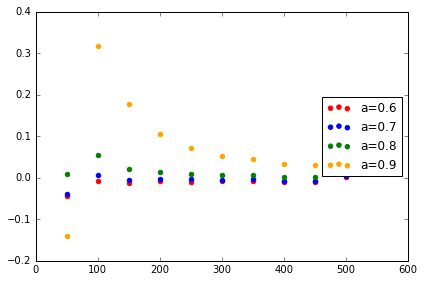

In [11]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
N=np.arange(50, 550, 50)
alpha = np.arange(0.6, 1.0,0.1)
beta=np.full(4, 1.0)
s=np.full(4,1.0)
from numba import jit



@jit
def ols_est_calc(data, N, alpha):
    sm_x=data[0]
    sm_y=data[1]
    sm_x_times_y=data[2]
    sm_x_sqrd=data[3] 
    n=N                  
    mean_x=sm_x/(n-1)
    mean_y=sm_y/n
   
    alpha_est_bias=((sm_x_times_y - n *mean_x *mean_y) / (sm_x_sqrd - n * (mean_x *mean_x)))-alpha
    return alpha_est_bias
@jit
def ar1_ols_data(n, alpha, beta, s):
    y=beta/(1-alpha)
    sm_x=0.0
    sm_y=0.0
    sm_x_times_y = 0.0
    sm_x_sqrd=0.0
    for i in range(0,n):
        noise=np.array(np.full(4, np.random.randn()))
        x=y
        sm_x +=x
        sm_x_sqrd +=x*x
        y=beta+alpha*y+s*noise
        sm_y+=x
        sm_x_times_y +=x*y
        
    data=[sm_x, sm_y, sm_x_times_y, sm_x_sqrd]
    data=np.array(data)

    return data
   

def ar_1_ols_trials(N):
    trials=[]
    for n in N:
        sm_results=np.full(4,0)
        for k in range(100):
            data=ar1_ols_data(n, alpha, beta, s)
            results=ols_est_calc(data, n, alpha)
            sm_results +=results
            avg_bias=sm_results/100
        trials.append(avg_bias)
    return trials

def create_graph():
    trials=ar_1_ols_trials(N)
    points=[]
    par1_list=[]
    par2_list=[]
    par3_list=[]
    par4_list=[]
    for array in trials:
        par1_list.append(array[0])
        par2_list.append(array[1])
        par3_list.append(array[2])
        par4_list.append(array[3])
    x=np.arange(50, 550, 50)
    p1=plt.scatter(x,par1_list,color='red')  
    p2=plt.scatter(x,par2_list, color='blue')
    p3=plt.scatter(x,par3_list, color='green')
    p4=plt.scatter(x,par4_list, color='orange')
    plt.tight_layout()              
    plt.legend([p1, p2, p3, p4], ["a=0.6", "a=0.7", "a=0.8", "a=0.9"],loc=5)
    
    
create_graph()


